In [14]:
import pandas as pd

In [15]:
df=pd.read_csv("afa2e701598d20110228.csv",sep=';')
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [17]:
df.isna().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [18]:
df.shape

(2861, 11)

In [34]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']
df.dropna(subset=pollutants,inplace=True)

In [35]:
df.isna().sum()

id           0
date         0
NH4          2
BSK5         0
Suspended    2
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
dtype: int64

In [36]:
df.describe()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year
count,2780.000000,2780,2778.000000,2780.000000,2778.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000
mean,12.279856,2010-04-11 19:10:57.841726464,0.634145,4.248248,12.881451,9.549462,4.349107,0.224384,59.671929,0.393275,94.398489,2009.784532
min,1.000000,2000-01-10 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000,8.500000,2000.000000
25%,8.000000,2005-03-17 00:00:00,0.080000,2.120000,6.000000,7.100000,1.400000,0.030000,27.100000,0.129750,26.800000,2005.000000
50%,13.000000,2010-05-12 00:00:00,0.220000,3.745000,10.000000,9.000000,2.825000,0.057500,37.800000,0.270000,33.900000,2010.000000
75%,16.000000,2015-06-09 00:00:00,0.480000,5.700000,14.400000,11.632500,5.600000,0.120000,65.145000,0.460000,45.732500,2015.000000
max,22.000000,2021-04-07 00:00:00,30.260000,27.120000,595.000000,90.000000,133.400000,109.000000,3573.400000,11.660000,5615.280000,2021.000000
std,6.072261,NaN,1.829515,2.760254,16.655984,4.453361,6.953503,2.157737,97.074655,0.640663,396.720467,5.931719


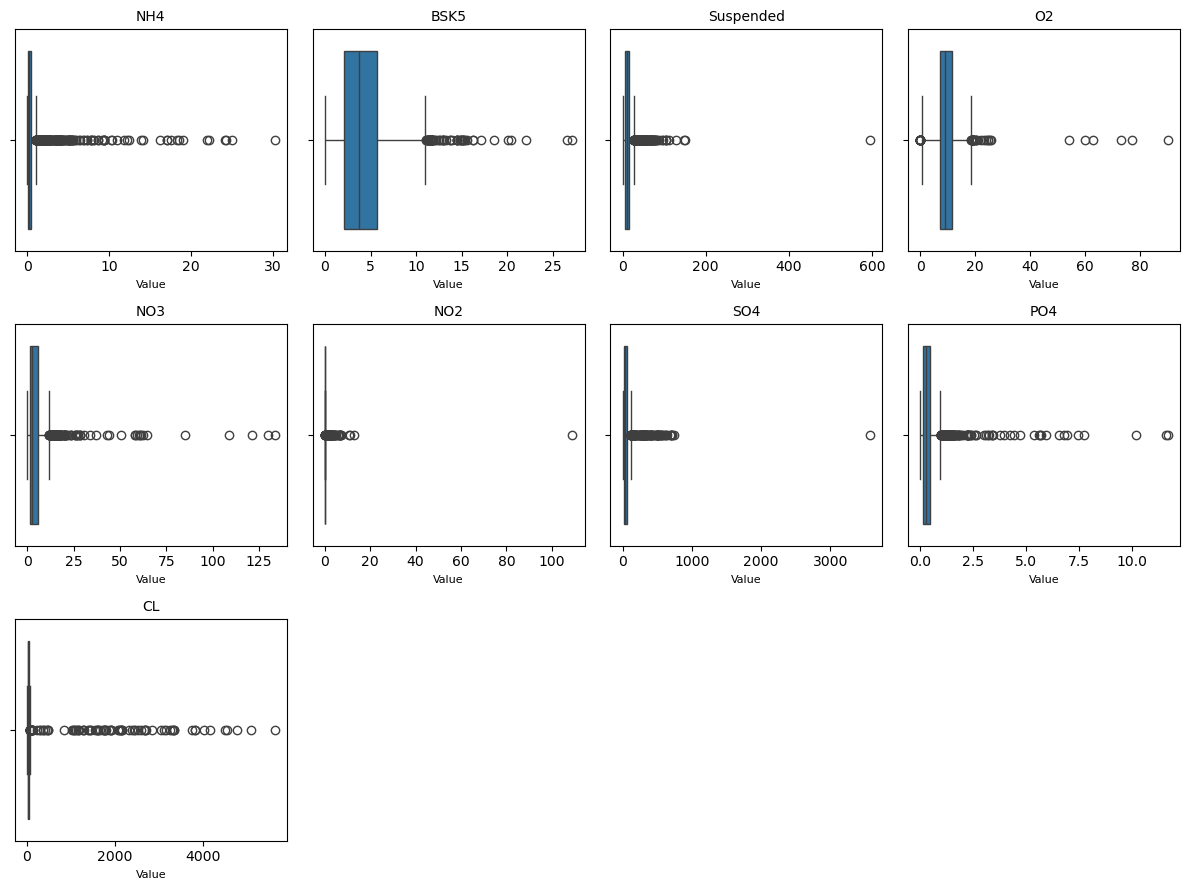

In [37]:
import seaborn as sns
columns_continuous=["NH4","BSK5","Suspended","O2","NO3","NO2","SO4","PO4","CL"]
import matplotlib.pyplot as plt
import math

# Auto layout calculation
box_width = 3
max_total_width = 12
plots_per_row = max(1, int(max_total_width / box_width))

num_cols = len(columns_continuous)
num_rows = math.ceil(num_cols / plots_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(plots_per_row * box_width, num_rows * 3), squeeze=False)
axes = axes.flatten()

# Plot each column with seaborn
for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("Value", fontsize=8)
    axes[i].set_ylabel("")  # no y-axis since it's horizontal

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [38]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [39]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year

X = df[['id', 'year']]
y = df[pollutants]

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001


In [41]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [43]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [44]:
y_pred = model.predict(X_test)

In [49]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()



Model Performance on the Test Data:
O2:
   MSE: 22.21825046040189
   R2: -0.01674257045728833

NO3:
   MSE: 18.153106746365886
   R2: 0.5162032171220556

NO2:
   MSE: 10.607352172601502
   R2: -78.42066512350873

SO4:
   MSE: 2412.139350033052
   R2: 0.4118345603876148

PO4:
   MSE: 0.38496938017964155
   R2: 0.3221189891402043

CL:
   MSE: 34882.81433245622
   R2: 0.7357918194149974



In [50]:
y_test

,O2,NO3,NO2,SO4,PO4,CL
1576,9.10,5.10,0.081,30.10,1.000,33.50
1114,8.69,1.92,0.066,87.04,0.059,48.21
1470,6.20,1.80,0.250,20.70,0.150,14.40
924,7.60,0.84,0.025,28.20,0.620,24.70
521,13.75,0.27,0.017,49.92,0.032,44.49
...,...,...,...,...,...,...
238,8.02,2.45,0.021,98.40,0.490,46.50
2095,8.70,0.80,0.210,32.20,0.200,28.20
1636,6.40,7.90,0.170,34.00,0.060,44.60
2585,7.80,18.30,0.018,153.64,0.153,23.87


In [51]:
y_pred

array([[8.52544353e+00, 2.16147100e+00, 1.60322224e-01, 3.83792622e+01,
        2.04133700e-01, 3.18903084e+01],
       [6.96255417e+00, 1.39084278e+00, 2.76966667e-02, 8.62801750e+01,
        3.59104750e-01, 5.03306525e+01],
       [8.22226603e+00, 1.65348693e+00, 1.23247273e-01, 2.78735004e+01,
        2.29861781e-01, 2.20580908e+01],
       ...,
       [8.32908207e+00, 1.92365484e+00, 4.30767884e-02, 4.80870428e+01,
        5.19545286e-01, 3.90892663e+01],
       [5.93515417e+00, 1.03160212e+01, 2.73463929e-01, 9.25054997e+01,
        2.63186333e-01, 6.33253984e+01],
       [1.12816260e+01, 6.37590190e+00, 2.68917857e-02, 5.89325110e+01,
        2.55561238e-01, 3.09106602e+01]])